# Morphometrics

The `label` function and 

In [20]:
import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget

def connected_components(filename, sigma=1.0, t=0.5, connectivity=2):
    # load the image
    image = iio.imread(filename)
    # convert the image to grayscale
    gray_image = ski.color.rgb2gray(image)
    # denoise the image with a Gaussian filter
    blurred_image = ski.filters.gaussian(gray_image, sigma=sigma)
    # mask the image according to threshold
    binary_mask = blurred_image < t
    # perform connected component analysis
    labeled_image, count = ski.measure.label(binary_mask, connectivity=connectivity, return_num=True)
    return labeled_image, count

labeled_image, count = connected_components(filename="../data/raw/training/shapes-01.jpg", sigma=2.0, t=0.9)

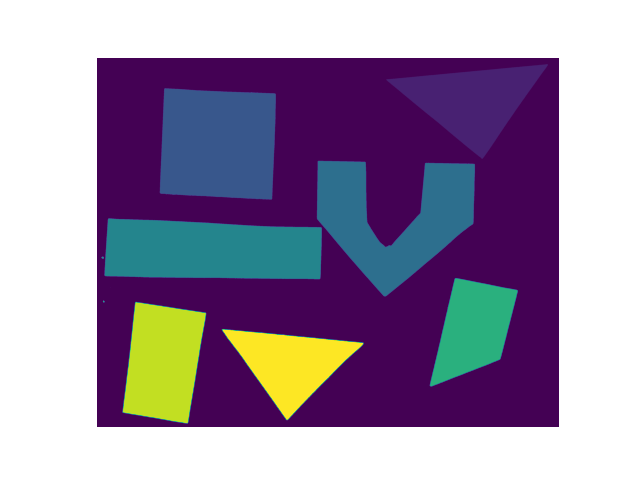

In [21]:
fig, ax = plt.subplots()
ax.imshow(labeled_image)
ax.set_axis_off();

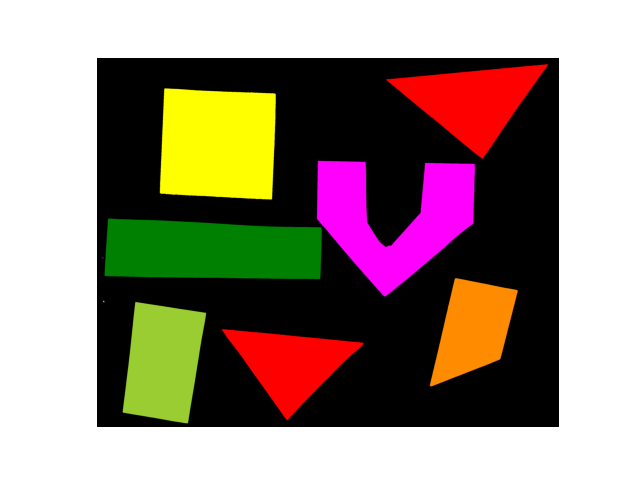

In [22]:
colored_label_image = ski.color.label2rgb(labeled_image, bg_label=0)

fig, ax = plt.subplots()
ax.imshow(colored_label_image)
ax.set_axis_off();

In [26]:
object_features = ski.measure.regionprops(labeled_image)
object_areas = [objf["area"] for objf in object_features]
object_areas

[318539.0,
 1.0,
 523207.0,
 496622.0,
 517330.0,
 143.0,
 256215.0,
 1.0,
 69.0,
 338787.0,
 265767.0]

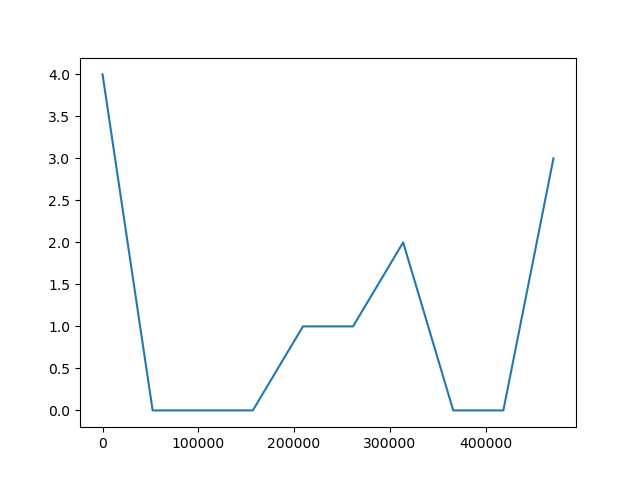

In [25]:
histogram, bin_edges = np.histogram(object_areas)
fig, ax = plt.subplots()
ax.plot(bin_edges[:-1], histogram)

(array([4., 0., 0., 0., 1., 1., 2., 0., 0., 3.]),
 array([1.000000e+00, 5.232160e+04, 1.046422e+05, 1.569628e+05,
        2.092834e+05, 2.616040e+05, 3.139246e+05, 3.662452e+05,
        4.185658e+05, 4.708864e+05, 5.232070e+05]),
 <BarContainer object of 10 artists>)

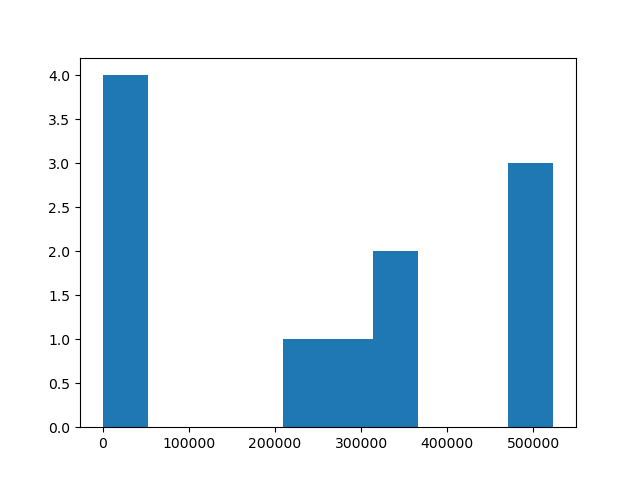

In [28]:
fig, ax = plt.subplots()
ax.hist(object_areas, bins=10)

Using the numpy library is faster than if and for loops.

In [38]:
# remove the object from object_areas which are less
# than a certain threshold
threshold = 150
object_areas = [area for area in object_areas if area >= threshold]
# counq the number of objects
num_objects = len(object_areas)
PendingDeprecationWarning
print(f"Number of objects: {num_objects}")

input_array = np.array(object_areas)
output_array = input_array[input_array > threshold]
print(output_array)

object_areas = np.array([objf["area"] for objf in object_features])
object_labels = np.array([objf["label"] for objf in object_features])
large_objects = object_labels[object_areas > threshold]
print(large_objects)

Number of objects: 7
[318539. 523207. 496622. 517330. 256215. 338787. 265767.]
[ 1  3  4  5  7 10 11]
